<a href="https://colab.research.google.com/github/ilia-stepanov/ab_tests/blob/main/Cuped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import make_regression

In [2]:
X, y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1, random_state=2, noise=70)
df = pd.DataFrame(X).merge(pd.DataFrame(y), left_index=True, right_index=True)
df.columns = ['covariate', 'target']
df.corr()

,covariate,target
covariate,1.000000,0.800311
target,0.800311,1.000000


In [3]:
index_a = df.sample(500, random_state=15).index

x = df.target[df.index.isin(index_a)]
y = df.target[df.index.isin(index_a)==False]
print('ttest_ind', stats.ttest_ind(x, y), 'mannwhitneyu', stats.mannwhitneyu(x, y), 'x_mean', x.mean(), 'y_mean', y.mean(), 'x_median', x.median(), 'y_median', y.median(), sep='\n')

ttest_ind
Ttest_indResult(statistic=-0.03023732721667363, pvalue=0.9758838248814645)
mannwhitneyu
MannwhitneyuResult(statistic=124168.0, pvalue=0.42775938163668803)
x_mean
-3.918625275557557
y_mean
-3.703456502522179
x_median
-9.863889276798762
y_median
-7.703052286886049


In [4]:
theta = np.cov(df.covariate, df.target)[0][1] / np.var(df.covariate)
df['target_cuped'] = df.target - (df.covariate - df.covariate.mean()) * theta
x = df.target_cuped[df.index.isin(index_a)]
y = df.target_cuped[df.index.isin(index_a)==False]

print('ttest_ind', stats.ttest_ind(x, y), 'mannwhitneyu', stats.mannwhitneyu(x, y), 'x_mean', x.mean(), 'y_mean', y.mean(), 'x_median', x.median(), 'y_median', y.median(), sep='\n')

ttest_ind
Ttest_indResult(statistic=-0.14984472535130253, pvalue=0.8809173983137331)
mannwhitneyu
MannwhitneyuResult(statistic=124095.0, pvalue=0.4214963168414342)
x_mean
-4.130704940170374
y_mean
-3.491376837909364
x_median
-8.710434934294412
y_median
-4.559686376285528


# Adding 15% growth for a group

In [6]:
df_copy = df.copy()

In [7]:
df.target[df.index.isin(index_a)] = df.target[df.index.isin(index_a)] + (df.target[df.index.isin(index_a)].abs() * 0.15)

In [8]:
x = df.target[df.index.isin(index_a)]
y = df.target[df.index.isin(index_a)==False]

print('ttest_ind', stats.ttest_ind(x, y), 'mannwhitneyu', stats.mannwhitneyu(x, y), 'x_mean', x.mean(), 'y_mean', y.mean(), 'x_median', x.median(), 'y_median', y.median(), sep='\n')

ttest_ind
Ttest_indResult(statistic=1.8035741751083179, pvalue=0.07159956494207757)
mannwhitneyu
MannwhitneyuResult(statistic=119578.0, pvalue=0.11757482637927646)
x_mean
9.19071660071462
y_mean
-3.703456502522179
x_median
-8.384305885278948
y_median
-7.703052286886049


In [9]:
theta = np.cov(df.covariate, df.target)[0][1] / np.var(df.covariate)
df['target_cuped'] = df.target - (df.covariate - df.covariate.mean()) * theta
df.describe()

x = df[df.index.isin(index_a)].target_cuped
y = df[df.index.isin(index_a)==False].target_cuped

print('ttest_ind', stats.ttest_ind(x, y), 'mannwhitneyu', stats.mannwhitneyu(x, y), 'x_mean', x.mean(), 'y_mean', y.mean(), 'x_median', x.median(), 'y_median', y.median(), sep='\n')

ttest_ind
Ttest_indResult(statistic=2.906075259654106, pvalue=0.0037408097780002167)
mannwhitneyu
MannwhitneyuResult(statistic=113840.0, pvalue=0.007268706234286514)
x_mean
8.977717513021314
y_mean
-3.490457414828858
x_median
2.249955259952494
y_median
-4.323375396241051


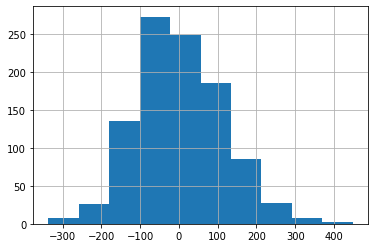

In [10]:
df.target.hist()

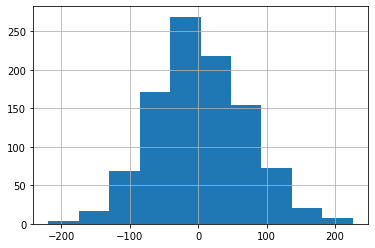

In [11]:
df.target_cuped.hist()

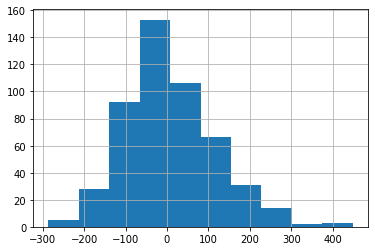

In [12]:
df.target[df.index.isin(index_a)].hist()

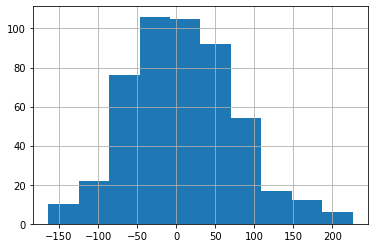

In [13]:
df.target_cuped[df.index.isin(index_a)].hist()

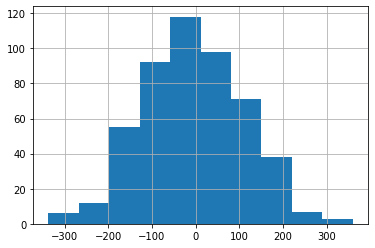

In [14]:
df.target[df.index.isin(index_a)==False].hist()

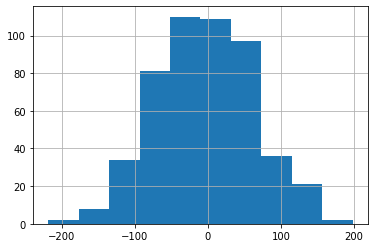

In [15]:
df.target_cuped[df.index.isin(index_a)==False].hist()

In [ ]:
Source:
https://booking.ai/how-booking-com-increases-the-power-of-online-experiments-with-cuped-995d186fff1d
https://towardsdatascience.com/cuped-r-shiny-tool-7a4869d77f0a
https://medium.com/statistics-experiments/cuped-%D0%B8%D0%BB%D0%B8-%D1%83%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%87%D1%83%D0%B2%D1%81%D1%82%D0%B2%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8-%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B8-de7183fc964c
https://towardsdatascience.com/online-experiments-tricks-variance-reduction-291b6032dcd7
https://towardsdatascience.com/having-issues-with-under-powered-a-b-tests-try-controlling-your-variability-903748f0aefd

